In [18]:
import os
from copy import deepcopy
import cv2 as cv
from matplotlib import pyplot as plt

In [19]:
captain = cv.imread("CaptainAmericaHughes.jpg")

In [21]:
def display_img(img, axis='on'):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    if axis!='on':
        plt.axis('off')
    plt.show()

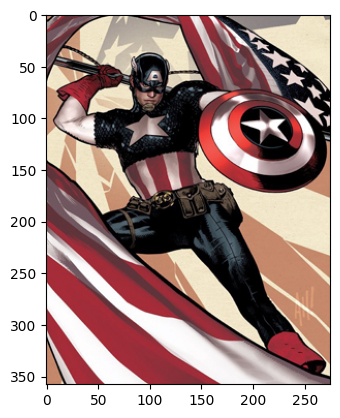

In [22]:
display_img(captain)

## Resizing the image

In [24]:
## Resize the image
## Resize by size
captain.shape

(358, 275, 3)

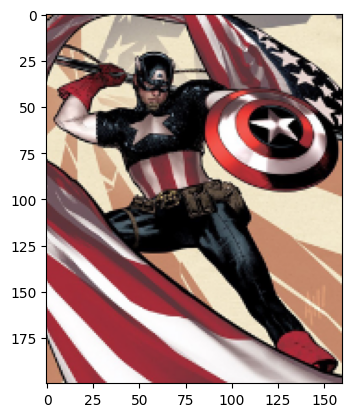

In [27]:
width = 200
height = 160
captain_resized = cv.resize(captain, (height, width), cv.INTER_LINEAR)
display_img(captain_resized)

In [28]:
captain_resized.shape

(200, 160, 3)

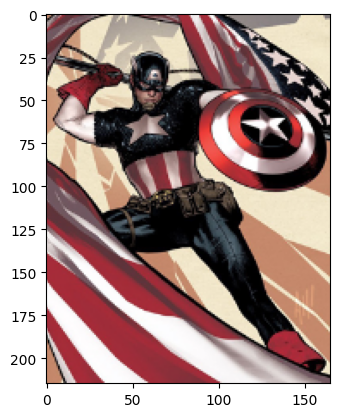

In [32]:
## Keeping the same aspect ratio
# Scaling down
captain_resized = cv.resize(captain, None, fx=0.6, fy=0.6, interpolation=cv.INTER_LINEAR)
display_img(captain_resized)

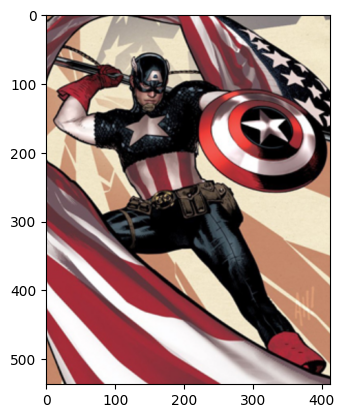

In [33]:
# Scaling UP
captain_resized = cv.resize(captain, None, fx=1.5, fy=1.5, interpolation=cv.INTER_LINEAR)
display_img(captain_resized)

In [ ]:
"""
INTER_AREA: INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). When used for zooming into the image, it uses the INTER_NEAREST method.
INTER_CUBIC: This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.
INTER_LINEAR: This method is somewhat similar to the INTER_CUBIC interpolation. But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.
INTER_NEAREST: The INTER_NEAREST method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only one neighboring pixel from the image for interpolation.
"""

## Image Thresholding

In [34]:
# Mainly used in Optical character recognition
## Global Thresholding => Thresholding applied to every pixel equally

In [ ]:
"""
for each pixel in image
do:
if pizel>thresh:
    set a value
else:
    set another value
"""

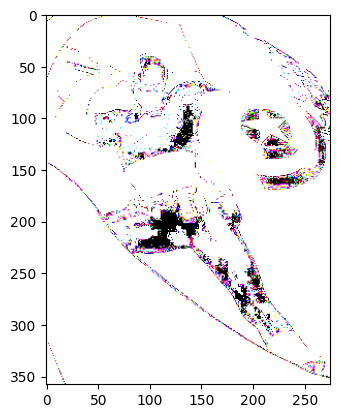

In [36]:
# cv.threshold(img, thresh_value, maxvalue, thresh_type)
# if pixel>0 then 255 else 0
th, dst = cv.threshold(captain, 0, 255, cv.THRESH_BINARY); 
display_img(dst) # All Black Pixels

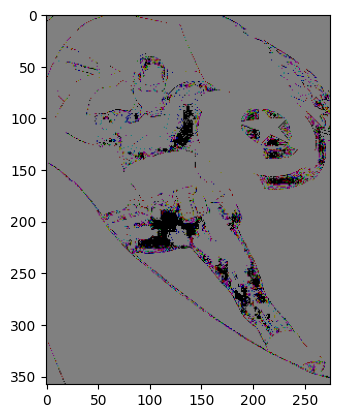

In [38]:
# if pixel>0 then 128 otherwise 0
th, dst = cv.threshold(captain, 0, 128, cv.THRESH_BINARY); 
display_img(dst)

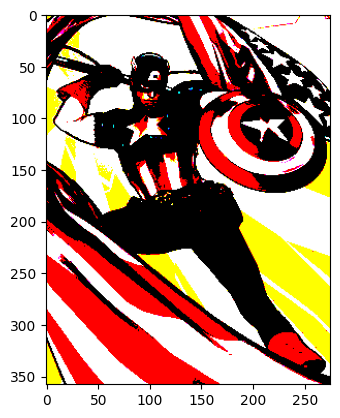

In [39]:
# Less than 127 =>0, Greater than 127=>255
th, dst = cv.threshold(captain, 127, 255, cv.THRESH_BINARY); 
display_img(dst) 

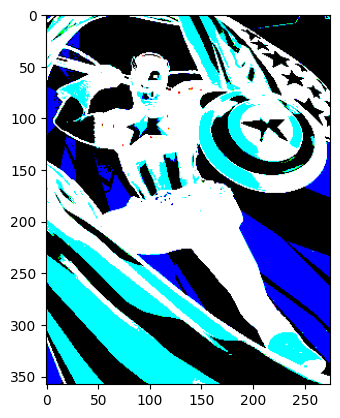

In [47]:
# if pixel >127 then 0 otherwise 255
th, dst = cv.threshold(captain, 127, 255, cv.THRESH_BINARY_INV); 
display_img(dst)

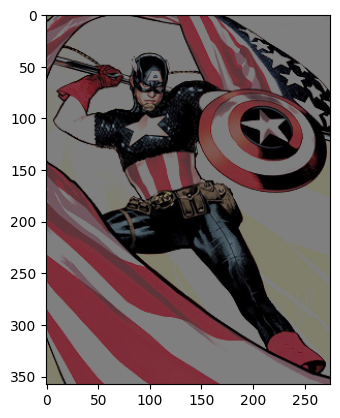

In [50]:
# if pixel >127 then 127 otherwise pixel value. # max value ignored
# 0 is given as max value, but it is ignored in Trunc
th, dst = cv.threshold(captain, 127,0, cv.THRESH_TRUNC)
display_img(dst)

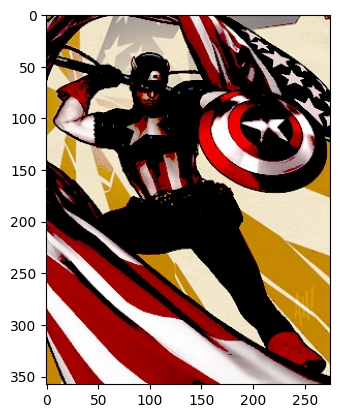

In [51]:
# if pixel>thresh then pixel otherwise 0
# Max value ignored
th, dst = cv.threshold(captain, 127,0, cv.THRESH_TOZERO)
display_img(dst)

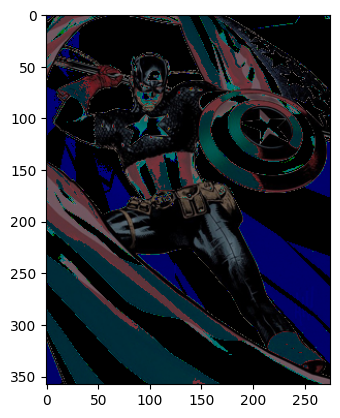

In [52]:
# if pixel>thresh then 0 otherwise pixel
th, dst = cv.threshold(captain, 127,0, cv.THRESH_TOZERO_INV)
display_img(dst)

## Cropping Image

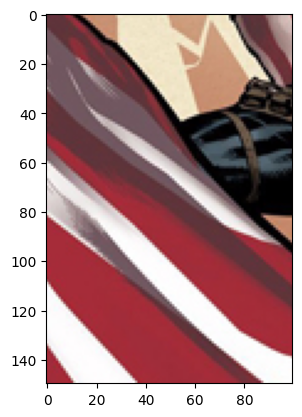

In [58]:
display_img(captain[150:300,0:100])

In [59]:
# Bitwise Operation
import cv2
import numpy as np

img1 = np.zeros((250, 500, 3), np.uint8)
img1 = cv2.rectangle(img1,(200, 0), (300, 100), (255, 255, 255), -1)
img2 = cv2.imread("image_1.png")

bitAnd = cv2.bitwise_and(img2, img1)
bitOr = cv2.bitwise_or(img2, img1)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot1 = cv2.bitwise_not(img1)
bitNot2 = cv2.bitwise_not(img2)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)
cv2.imshow('bitAnd', bitAnd)
cv2.imshow('bitOr', bitOr)
cv2.imshow('bitXor', bitXor)
cv2.imshow('bitNot1', bitNot1)
cv2.imshow('bitNot2', bitNot2)

cv2.waitKey(0)
cv2.destroyAllWindows()

Hello


In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    print(x)

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')

cv.createTrackbar('B', 'image', 0, 255, nothing)
cv.createTrackbar('G', 'image', 0, 255, nothing)
cv.createTrackbar('R', 'image', 0, 255, nothing)

switch = '0 : OFF\n 1 : ON'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

    b = cv.getTrackbarPos('B', 'image')
    g = cv.getTrackbarPos('G', 'image')
    r = cv.getTrackbarPos('R', 'image')
    s = cv.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]


cv.destroyAllWindows()


In [ ]:
#Object Detection
import cv2
import numpy as np

def nothing(x):
    pass

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    frame = cv2.imread('smarties.png')

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, l_b, u_b)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

In [ ]:
mport cv2
import numpy as np

def nothing(x):
    pass

cap = cv2.VideoCapture(0);

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

while True:
    #frame = cv2.imread('smarties.png')
    _, frame = cap.read()

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")

    u_h = cv2.getTrackbarPos("UH", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, l_b, u_b)

    res = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()